In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def remove_outliers(df, column_name):
    """
    Removes outliers from a DataFrame based on the specified column using the IQR method.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        column_name (str): The name of the column to check for outliers.
        
    Returns:
        pd.DataFrame: A new DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to exclude outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

In [3]:
# Example DataFrame
data = {
    'id': [1, 2, 3, 4, 5],
    'annual_income': [27000, 120000, 1575000, 45000, 30000]
}
df = pd.DataFrame(data)
df

,id,annual_income
0,1,27000
1,2,120000
2,3,1575000
3,4,45000
4,5,30000


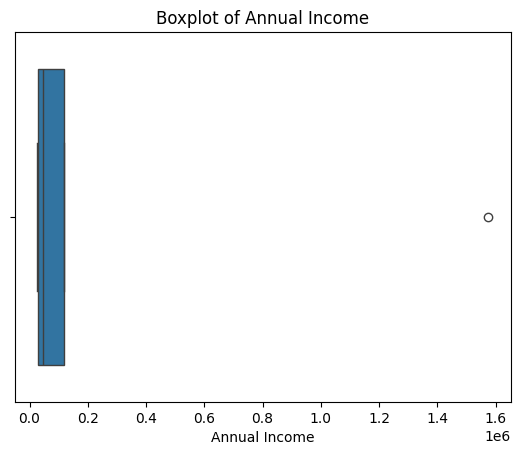

In [ ]:
# Create a boxplot to visualize outliers in the 'annual_income' column
sns.boxplot(x=df['annual_income'])
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

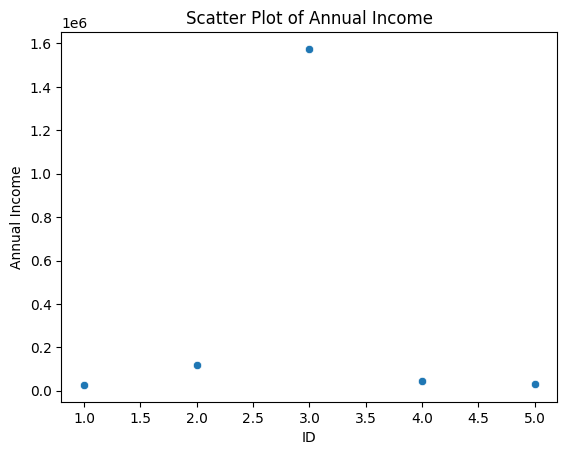

In [8]:
# Create a scatter plot to visualize outliers in the 'annual_income' column
sns.scatterplot(x=df['id'], y=df['annual_income'])
plt.title('Scatter Plot of Annual Income')
plt.xlabel('ID')
plt.ylabel('Annual Income')
plt.show()

In [4]:
# Remove outliers from the 'annual_income' column
filtered_df = remove_outliers(df, 'annual_income')

# Print the result
print(filtered_df)

   id  annual_income
0   1          27000
1   2         120000
3   4          45000
4   5          30000
